# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading CIFAR data
iteration 0 / 2000: Validation Accuracy: 0.136 Training Accuracy 0.138 Loss 2.30258590583
Best Val Acc 0.136
iteration 293 / 2000: Validation Accuracy: 0.477 Training Accuracy 0.478 Loss 1.48685002451
Best Val Acc 0.477
iteration 587 / 2000: Validation Accuracy: 0.499 Training Accuracy 0.604 Loss 1.20124993908
Best Val Acc 0.499
iteration 881 / 2000: Validation Accuracy: 0.523 Training Accuracy 0.596 Loss 1.14663551188
Best Val Acc 0.523
iteration 1175 / 2000: Validation Accuracy: 0.55 Training Accuracy 0.638 Loss 1.05113382161
Best Val Acc 0.55
iteration 1469 / 2000: Validation Accuracy: 0.544 Training Accuracy 0.662 Loss 1.03325555036
iteration 1763 / 2000: Validation Accuracy: 0.548 Training Accuracy 0.73 Loss 0.882016904603


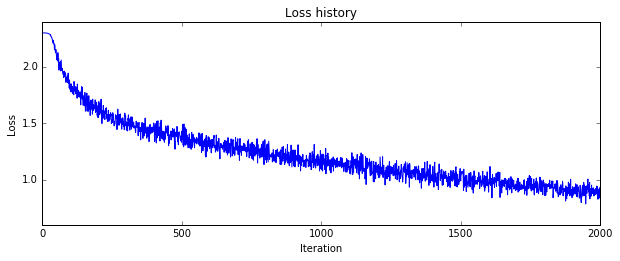

In [6]:
import neural_net, data_utils
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

if __name__ == '__main__':

    input_size = 3072
    hidden_size = 500
    output_size =10
    momentum =0.95

    X_train, y_train, X_test, y_test = data_utils.load_CIFAR10("C:\Users\SHARATH\Git\cs291k-mp1\dataset")
    nn = neural_net.TwoLayerNet(input_size, hidden_size, output_size, 0.00001, momentum)

    #Configuration Parameters
    training_size =49000
    test_size = 10000
    validation_size = 1000

    learning_rate = 0.0001
    learning_rate_decay = 0.95
    reg = 0.01
    num_iters = 2000
    batch_size = 500
    verbose = True

    # Subsample the data
    mask = range(training_size, training_size + validation_size)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(training_size)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(test_size)
    X_test = X_test[mask]
    y_test = y_test[mask]


    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(training_size, -1)
    X_val = X_val.reshape(validation_size, -1)
    X_test = X_test.reshape(test_size, -1)


    output = nn.train(X_train, y_train, X_val, y_val,
             learning_rate, learning_rate_decay,
             reg, num_iters,
             batch_size, verbose)
    # Plot the loss function and train / validation accuracies
    loss = output['loss_history']
    plt.subplot(2, 1, 1)
    plt.plot(loss)
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the function `two_layer_net`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

[[-0.5328368   0.20031504  0.93346689]
 [-0.59412164  0.15498488  0.9040914 ]
 [-0.67658362  0.08978957  0.85616275]
 [-0.77092643  0.01339997  0.79772637]
 [-0.89110401 -0.08754544  0.71601312]]
Difference between your scores and correct scores:
3.84868229474e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

Difference between your loss and correct loss:
4.67692551354e-12


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

b2 max relative error: 8.190173e-11
W2 max relative error: 2.045493e-09
W1 max relative error: 4.426512e-09
b1 max relative error: 5.435436e-08


# Train the network
To train the network we will use SGD with Momentum. Last assignment you implemented vanilla SGD. You will now implement the momentum update and the RMSProp update. Open the file `classifier_trainer.py` and familiarze yourself with the `ClassifierTrainer` class. It performs optimization given an arbitrary cost function data, and model. By default it uses vanilla SGD, which we have already implemented for you. First, run the optimization below using Vanilla SGD:

Now fill in the **momentum update** in the first missing code block inside the `train` function, and run the same optimization as above but with the momentum update. You should see a much better result in the final obtained loss:

starting iteration  0
starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
starting iteration  60
starting iteration  70
starting iteration  80
starting iteration  90
Final loss with momentum SGD: 0.494394. We get: 0.494394


Now also implement the **RMSProp** update rule inside the `train` function and rerun the optimization:

starting iteration  0
starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
starting iteration  60
starting iteration  70
starting iteration  80
starting iteration  90
Final loss with RMSProp: 0.439368. We get: 0.439368


# Load the data
Now that you have implemented a two-layer network that passes gradient checks, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier.

cs231n\datasets
cs231n\datasets\data_batch_1
cs231n\datasets\data_batch_2
cs231n\datasets\data_batch_3
cs231n\datasets\data_batch_4
cs231n\datasets\data_batch_5
cs231n\datasets\test_batch
The shapes before transformation 
(1000L, 32L, 32L, 3L)
(1000L,)
Type 
<type 'numpy.ndarray'>
Train data shape:  (49000L, 3072L)
Train labels shape:  (49000L,)
Validation data shape:  (1000L, 3072L)
Validation labels shape:  (1000L,)
Test data shape:  (1000L, 3072L)
Test labels shape:  (1000L,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

starting iteration  0
Finished epoch 0 / 5: cost 2.302593, train: 0.112000, val 0.100000, lr 1.000000e-05
starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
starting iteration  60
starting iteration  70
starting iteration  80
starting iteration  90
starting iteration  100
starting iteration  110
starting iteration  120
starting iteration  130
starting iteration  140
starting iteration  150
starting iteration  160
starting iteration  170
starting iteration  180
starting iteration  190
starting iteration  200
starting iteration  210
starting iteration  220
starting iteration  230
starting iteration  240
starting iteration  250
starting iteration  260
starting iteration  270
starting iteration  280
starting iteration  290
starting iteration  300
starting iteration  310
starting iteration  320
starting iteration  330
starting iteration  340
starting iteration  350
starting iteration  360
starting iteration  370
starting iterat

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.37 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

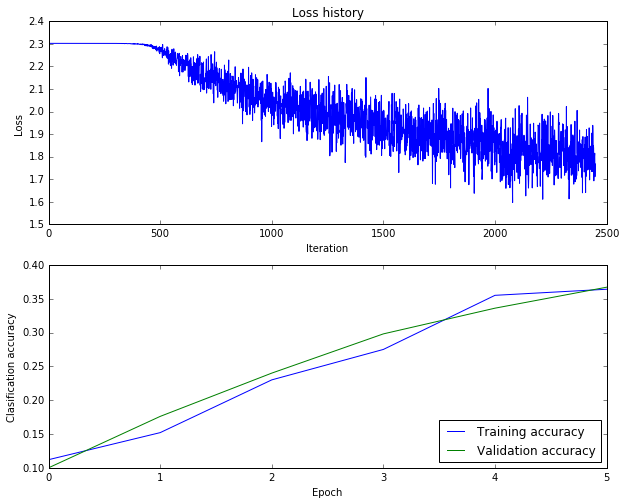

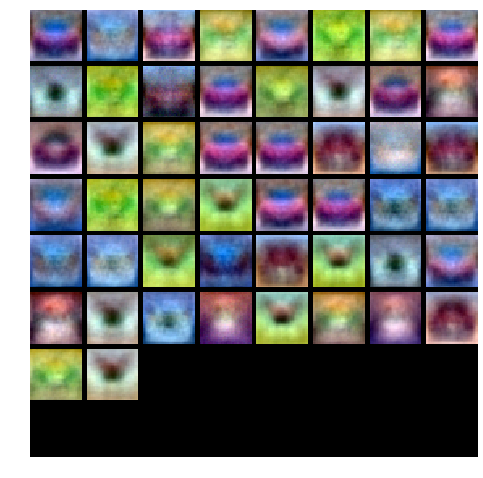

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the momentum and learning rate decay parameters, but you should be able to get good performance using the default values.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 50% on the validation set. Our best network gets over 56% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 56% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

Lambda 1.0
Learning rate 0.0001
Momentum 0.9
Decay 0.95
Epochs 20
Batch size 100
starting iteration  0
Finished epoch 0 / 20: cost 2.302663, train: 0.065000, val 0.068000, lr 1.000000e-04
starting iteration  10
starting iteration  20
starting iteration  30
starting iteration  40
starting iteration  50
starting iteration  60
starting iteration  70
starting iteration  80
starting iteration  90
starting iteration  100
starting iteration  110
starting iteration  120
starting iteration  130
starting iteration  140
starting iteration  150
starting iteration  160
starting iteration  170
starting iteration  180
starting iteration  190
starting iteration  200
starting iteration  210
starting iteration  220
starting iteration  230
starting iteration  240
starting iteration  250
starting iteration  260
starting iteration  270
starting iteration  280
starting iteration  290
starting iteration  300
starting iteration  310
starting iteration  320
starting iteration  330
starting iteration  340
start

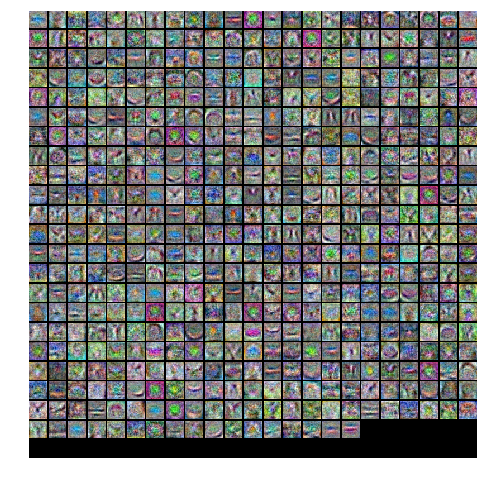

In [20]:
# visualize the weights
show_net_weights(best_model)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set. 

**We will give you extra bonus point for every 1% of accuracy above 56%.**

{'W1': array([[ -7.46278416e-04,   1.98499617e-04,  -4.57545348e-04, ...,
          4.18021936e-04,  -2.24140425e-05,  -4.08106576e-05],
       [ -1.32748335e-03,  -2.30625659e-04,  -1.88638012e-04, ...,
          1.21478723e-03,   2.30089457e-04,   1.11966214e-05],
       [ -2.35194373e-03,  -4.39258021e-04,   3.96107394e-04, ...,
          2.01618470e-03,  -1.79950144e-04,   5.34153395e-05],
       ..., 
       [ -1.80699654e-03,  -3.45447543e-04,  -6.68956955e-04, ...,
          1.07678414e-03,  -1.21096086e-03,   8.28466842e-05],
       [ -1.57207851e-03,   2.58217801e-04,  -1.03215778e-03, ...,
          3.76039948e-04,   4.41612453e-04,  -4.69008188e-05],
       [ -1.37820303e-03,   6.75655008e-04,  -9.92281431e-04, ...,
         -1.08265287e-04,   8.63043367e-04,  -1.86829301e-04]]), 'b1': array([  3.91477474e-04,   1.27639812e-04,  -3.67720201e-04,
         1.94182465e-04,  -2.57668873e-04,  -6.96935100e-05,
        -6.36668774e-04,  -1.58549181e-04,  -1.63597494e-05,
        -